# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.


First some practical information:

* When is the assignment due?: **23:59, Friday, August 14, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group**.

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. Do not submit your answers as a pdf. Do not convert the notebook to json and then submit that etc. :) 

## Problems from Exercise Set 3:

> **Ex. 3.2.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). Write _three sentences_ for this question. 
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.

"\n   It doesn't make sense to construct a boxplot, when working with binary variables. \n   Because a boxplot requires upper and lower quantiles, and the survival dummy variable is binary, there wouldn't be\n   any intervals present in the plot.\n\n"

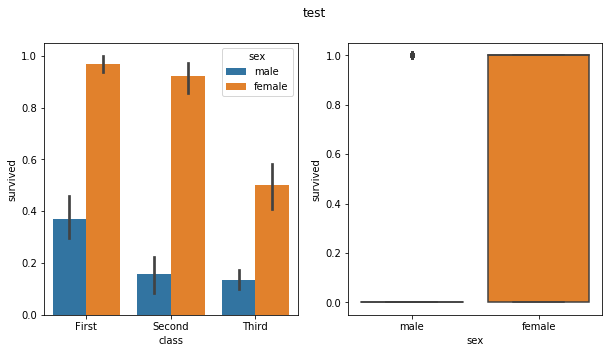

In [1]:
#CODE
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

#We load the dataset
%matplotlib inline 
titanic = sns.load_dataset('titanic')

#In the dataset we have information about 

#We print the first 5 rows of the dataset
titanic.head()

#In the dataset we have information about people survived, their sex, age and how much they payed for their trip and where they have embarked?

#Use a barplot to show the probability of survival for men and women within each passenger class. 
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10 , 5))
fig.suptitle('test')

sns.barplot(x = 'class', y = 'survived' , data = titanic, hue = 'sex' , ax = ax1)

sns.boxplot(x = 'sex' , y = 'survived' , data = titanic, ax = ax2) 

#Can you make a boxplot showing the same information (why/why not?). Write three sentences for this question.

"""
   It doesn't make sense to construct a boxplot, when working with binary variables. 
   Because a boxplot requires upper and lower quantiles, and the survival dummy variable is binary, there wouldn't be
   any intervals present in the plot.

"""

> **Ex. 3.2.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels to `sepal length` and `sepal width`.
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

'\nInstead of measuring the direct lengths in a scatterplot, one could instead calculate the ratio between the two types of flower pedals.\nThe ratio would probably be more intuitive, but this way of illustrating the data does indicate a correlation between the size of the Petal and Sepal\n\n'

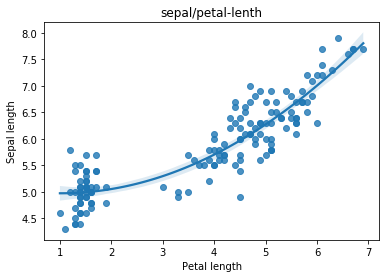

In [2]:
#CODE
iris = sns.load_dataset('iris')
sns.regplot(x=iris['petal_length'], y=iris['sepal_length'] , order = 2)

plt.title('sepal/petal-lenth')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')

"""
Instead of measuring the direct lengths in a scatterplot, one could instead calculate the ratio between the two types of flower pedals.
The ratio would probably be more intuitive, but this way of illustrating the data does indicate a correlation between the size of the Petal and Sepal

"""


> **Ex. 3.2.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file in this on your computer named `two_plots.png`. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

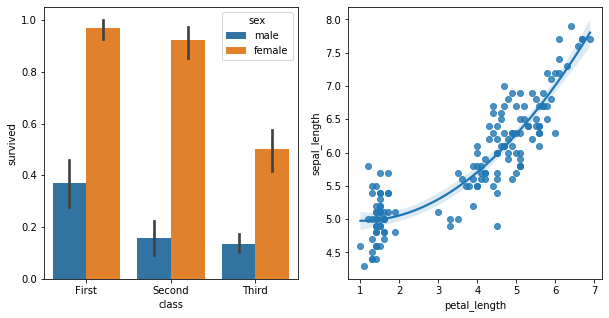

In [3]:
#CODE
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10 , 5))

sns.barplot(x = 'class', y = 'survived' , data = titanic, hue = 'sex' , ax = ax1)

sns.regplot(x=iris['petal_length'], y=iris['sepal_length'] , order = 2 , ax = ax2)

plt.savefig('two_plots.png')

> **Ex. 3.2.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots

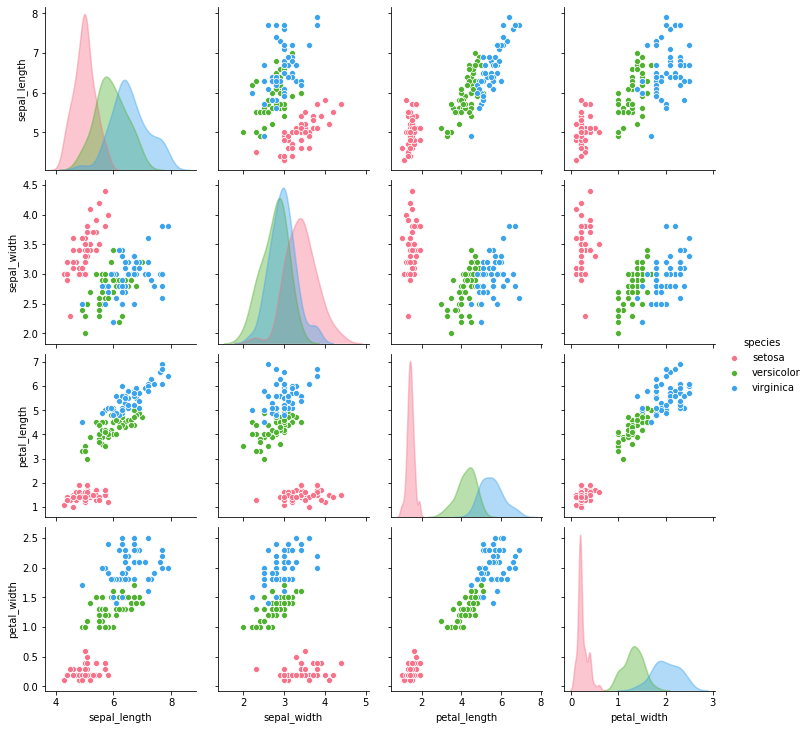

In [4]:
#CODE
sns.pairplot(iris , hue = 'species' , palette='husl' , diag_kws={'alpha':0.4})

## Problems from Exercise Set 4:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 4.1.1:** The code below runs through some of the steps we completed in exercise 4.1.1 in Module 4. As we are not going to request the website but load the data from a csv file your task is to **rewrite parts of the function**. Rename the function to `process_weather` instead of `load_weather`. The function should now  take a `dataframe` as input. The function should still run through the same processing steps although you should consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The doc string should also be rewritten. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `load_weather` function  to this dataframe and store the result in the variable `df_weather_period`.   

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [5]:
#CODE
import pandas as pd

# loads the data - we dont nede the iloc, since there are only 4 columns
df_weather = pd.read_csv('weather_data_1870-1875.csv')


def process_weather(dataname):
    '''
    This function structures and cleans the data.
    This includes renaming and selecting only observations of maximum temperature, inserting missing decimal, 
    sorting and resetting index.
    '''
    
    #Strukturing and cleaning - method chaining
    df_weather_period = \
        dataname\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_weather_period['area'] = df_weather_period['station'].str[0:2]

    # datetime process
    df_weather_period['datetime_dt'] = pd.to_datetime(df_weather_period['datetime'], format = '%Y%m%d')
    df_weather_period['month'] = df_weather_period['datetime_dt'].dt.month
    df_weather_period['year'] = df_weather_period['datetime_dt'].dt.year

    return df_weather_period

df_weather_period=process_weather(df_weather)
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871
...,...,...,...,...,...,...,...,...
132312,USW00094728,18751227,TMAX,10.6,US,1875-12-27,12,1875
132313,USW00094728,18751228,TMAX,1.1,US,1875-12-28,12,1875
132314,USW00094728,18751229,TMAX,2.8,US,1875-12-29,12,1875
132315,USW00094728,18751230,TMAX,6.7,US,1875-12-30,12,1875


In [6]:
assert any(df_weather_period.station == process_weather(pd.read_csv('weather_data_1870-1875.csv')).station)
assert any(df_weather_period.columns.values == ['station', 'datetime', 'obs_type', 'area', 
                                                'obs_value', 'datetime_dt', 'month', 'year'])
assert len(df_weather_period) == 132317
assert round(df_weather_period.obs_value.mean()) == 14

> **Ex. 4.1.1.1 (Not seen in module 4):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these observations be characterized as? Drop these three observations from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

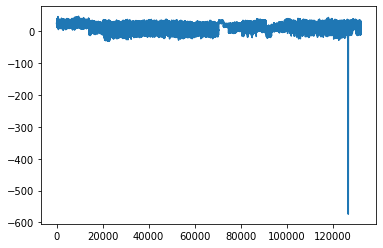

In [7]:
#CODE
df_weather_period.obs_value.plot()
df_weather_period=df_weather_period[df_weather_period.obs_value >= -50]

In [8]:
assert len(df_weather_period[df_weather_period.obs_value < -50]) == 0 

> **Ex. 4.1.3:** 
Continuing with the `df_weather_period` from last exercise, convert the `area` column to a categorical variable. 
Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. Call this new column for `obs_value_cat`.  This can be done using the `pd.cut()` method of pandas. 
Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.cut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [9]:
#CODE
df_weather_period['area'].astype('category')

df_weather_period['obs_value_cat']=pd.cut(df_weather_period['obs_value'], bins=3)
df_weather_period['obs_value_cat_labeled'] = pd.cut(df_weather_period['obs_value'], bins=3, labels=["cold", "medium", "hot"])

df_weather_period.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled
0,ASN00048013,18710425,TMAX,26.7,AS,1871-04-25,4,1871,"(21.5, 47.8]",hot
1,ASN00048013,18710426,TMAX,26.8,AS,1871-04-26,4,1871,"(21.5, 47.8]",hot
2,ASN00048013,18710427,TMAX,25.6,AS,1871-04-27,4,1871,"(21.5, 47.8]",hot
3,ASN00048013,18710428,TMAX,25.6,AS,1871-04-28,4,1871,"(21.5, 47.8]",hot
4,ASN00048013,18710429,TMAX,23.3,AS,1871-04-29,4,1871,"(21.5, 47.8]",hot


In [10]:
assert sorted(df_weather_period.obs_value_cat.value_counts()) == [7594, 38878, 85842]
assert sorted(df_weather_period.obs_value_cat_labeled.value_counts()) == [7594, 38878, 85842]

## Problems from Exercise Set 5:

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair on the dataframe `df_weather_period` from last exercise by using the `groupby` and `mean` methods. Store the results in the variable `tmax_mean`. 

In [11]:
#CODE
#Altering DataFrame

df_weather_period['datetime_dt'] = pd.to_datetime(df_weather_period.datetime.astype(str))

df_weather_period.set_index('datetime_dt', inplace = True)
df_weather_period['obs_value'] = df_weather_period['obs_value'].round(decimals = 0)
df_weather_period

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,station,datetime,obs_type,obs_value,area,month,year,obs_value_cat,obs_value_cat_labeled
datetime_dt,,,,,,,,,
1871-04-25,ASN00048013,18710425,TMAX,27.0,AS,4,1871,"(21.5, 47.8]",hot
1871-04-26,ASN00048013,18710426,TMAX,27.0,AS,4,1871,"(21.5, 47.8]",hot
1871-04-27,ASN00048013,18710427,TMAX,26.0,AS,4,1871,"(21.5, 47.8]",hot
1871-04-28,ASN00048013,18710428,TMAX,26.0,AS,4,1871,"(21.5, 47.8]",hot
1871-04-29,ASN00048013,18710429,TMAX,23.0,AS,4,1871,"(21.5, 47.8]",hot
...,...,...,...,...,...,...,...,...,...
1875-12-27,USW00094728,18751227,TMAX,11.0,US,12,1875,"(-4.8, 21.5]",medium
1875-12-28,USW00094728,18751228,TMAX,1.0,US,12,1875,"(-4.8, 21.5]",medium
1875-12-29,USW00094728,18751229,TMAX,3.0,US,12,1875,"(-4.8, 21.5]",medium


In [12]:
tmax_mean = df_weather_period.groupby(['year', 'month']).obs_value.mean()

tmax_mean.sum()

1016.8172887004639

In [13]:
assert round(tmax_mean.sum()) ==  1017

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'ITE00100550'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures.

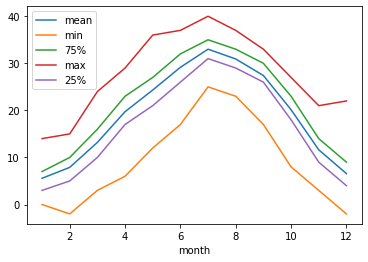

In [14]:
#Grouping and plotting data

describe = df_weather_period[df_weather_period.station == "ITE00100550"].groupby('month').obs_value.describe()
describe[['mean','min','75%','max','25%']].plot()

> **Ex. 5.1.4:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [15]:
#Constructing column names
colnames = ['station' , 'lat' , 'lon' , 'elevation' , 'STATE' , 'NAME' , 'GSN FLAG' , 'HCN/CRN FLAG' , 'WMO ID']

#Creating DataFrame based on URL
station_loc = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt' , header = None , names = colnames)

#Merging DataFrames and altering index
final_data = pd.merge(df_weather_period , station_loc , on = 'station' , how = 'left')
final_data['datetime_dt'] = pd.to_datetime(final_data.datetime.astype(str))
final_data.set_index('datetime_dt', inplace = True)


print(final_data)

                 station  datetime obs_type  obs_value area  month  year  \
datetime_dt                                                                
1871-04-25   ASN00048013  18710425     TMAX       27.0   AS      4  1871   
1871-04-26   ASN00048013  18710426     TMAX       27.0   AS      4  1871   
1871-04-27   ASN00048013  18710427     TMAX       26.0   AS      4  1871   
1871-04-28   ASN00048013  18710428     TMAX       26.0   AS      4  1871   
1871-04-29   ASN00048013  18710429     TMAX       23.0   AS      4  1871   
...                  ...       ...      ...        ...  ...    ...   ...   
1875-12-27   USW00094728  18751227     TMAX       11.0   US     12  1875   
1875-12-28   USW00094728  18751228     TMAX        1.0   US     12  1875   
1875-12-29   USW00094728  18751229     TMAX        3.0   US     12  1875   
1875-12-30   USW00094728  18751230     TMAX        7.0   US     12  1875   
1875-12-31   USW00094728  18751231     TMAX        7.0   US     12  1875   

           

In [16]:
#Checking mean
final_data.elevation.mean()

248.48796196929334

In [17]:
assert round(final_data.lon.mean()) == -17 
assert round(final_data.lat.mean()) == 43
assert round(final_data.elevation.mean())  == 248

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [18]:
#CODE
import requests
import pandas as pd

#her henter vi data fra URL og gemmer den som TotalResultCount
resp = requests.get('https://job.jobnet.dk/CV/FindWork/Search')
TotalResultCount = resp.json()['JobPositionPostings']
d = resp.json()

sorted(d.keys())

['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount']

In [19]:
assert sorted(d.keys()) == ['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount']

> **Ex. 6.1.3.:** Create a dataframe named `df` from the 'JobPositionPostings' field in the json object from the previous exercise.  

In [20]:
#CODE
#Her loader vi den som en pandas dataframe
df = pd.DataFrame(TotalResultCount)
df

len(df) == 20
sorted(df.columns)

['Abroad',
 'AnonymousEmployer',
 'AssignmentStartDate',
 'AutomatchType',
 'Country',
 'DetailsUrl',
 'EmploymentType',
 'FormattedLastDateApplication',
 'HasLocationValues',
 'HiringOrgCVR',
 'HiringOrgName',
 'ID',
 'IsExternal',
 'IsHotjob',
 'JobAnnouncementType',
 'JobHeadline',
 'JobLogUrl',
 'JoblogWorkTime',
 'LastDateApplication',
 'Latitude',
 'Location',
 'Longitude',
 'Municipality',
 'Occupation',
 'OccupationArea',
 'OccupationGroup',
 'OrganisationId',
 'PostalCode',
 'PostalCodeName',
 'PostingCreated',
 'Presentation',
 'Region',
 'ShareUrl',
 'Title',
 'Url',
 'UseWorkPlaceAddressForJoblog',
 'UserLoggedIn',
 'Weight',
 'WorkHours',
 'WorkPlaceAbroad',
 'WorkPlaceAddress',
 'WorkPlaceCity',
 'WorkPlaceNotStatic',
 'WorkPlaceOtherAddress',
 'WorkPlacePostalCode',
 'WorkplaceID']

In [21]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

## Problems from Exercise Set 8

> **Ex. 8.1.2:** From exercise 8.1.1 in Module 8 we found that the company `euphemia media` owns the domain "netbaby.dk". Now we want to gather further information about this company.

> Go to the Central Business Register website https://datacvr.virk.dk/data/. Figure out how to look up companies by changing the url and then lookup `euphemia media`. Use `requests` to get the html and parse this with `BeautifulSoup`. Store the parsed html in the variable `soup`. Find the CVR number in the `soup`, store this in the variable `cvr` and finally print this variable.

In [22]:
#CODE
from bs4 import BeautifulSoup
import requests
import re
import scraping_class
logfile = 'log.csv'
connector = scraping_class.Connector(logfile)

In [23]:
# Sending request
soegeterm = 'euphemia media'
soegeterm_url = soegeterm.replace(" ", "%20")

url = f'https://datacvr.virk.dk/data/visninger?soeg={soegeterm_url}&oprettet=null&ophoert=null&branche=&type=virksomhed&sortering=default&language=da'

response = connector.get(url,'exercise8')

html = response[0].text

soup = BeautifulSoup(html,'html.parser')

In [24]:
# Read request
cvr_text_elem = soup.find(class_ = 'cvr')
cvr = re.search('[0-9]+',cvr_text_elem.text).group()
cvr

'21848875'

In [25]:
import bs4; type(soup) == bs4.BeautifulSoup
assert str(cvr) == '21848875'